In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
%matplotlib inline
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from statistics import mode
import missingno as msno
#lines below let allow multiple results from a line of code to be shown e.g. df.head() + df.columns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#set this to ensure floats are not represented in scientific notation 
pd.set_option('display.float_format', lambda x: '%.18f' % x)

In [2]:
os.getcwd()

'C:\\Users\\Sam Cannon\\Desktop\\Python\\Data Competitions'

In [3]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\Data Sets')

In [4]:
data = pd.read_csv('housing_comp_train.csv')

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000000000000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000000000000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000000000000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000000000000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000000000000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000000000000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000000000000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000000000000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000000000000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000000000000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000000000000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000000000000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000000000000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000000000000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000000000000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test = pd.read_csv('housing_comp_test.csv')

I want to concatenate these data sets so that I can clean them both at the same time, saves time down the road, I will just place a 1 flag for the test set and a 0 flag for the training set

In [6]:
data['trainflag'] = 0
test['testflag'] = 1

In [7]:
cleaning_data = pd.concat([data, test], sort=True)

In [8]:
cleaning_data.shape

(2919, 83)

__Visualizing Missingness__

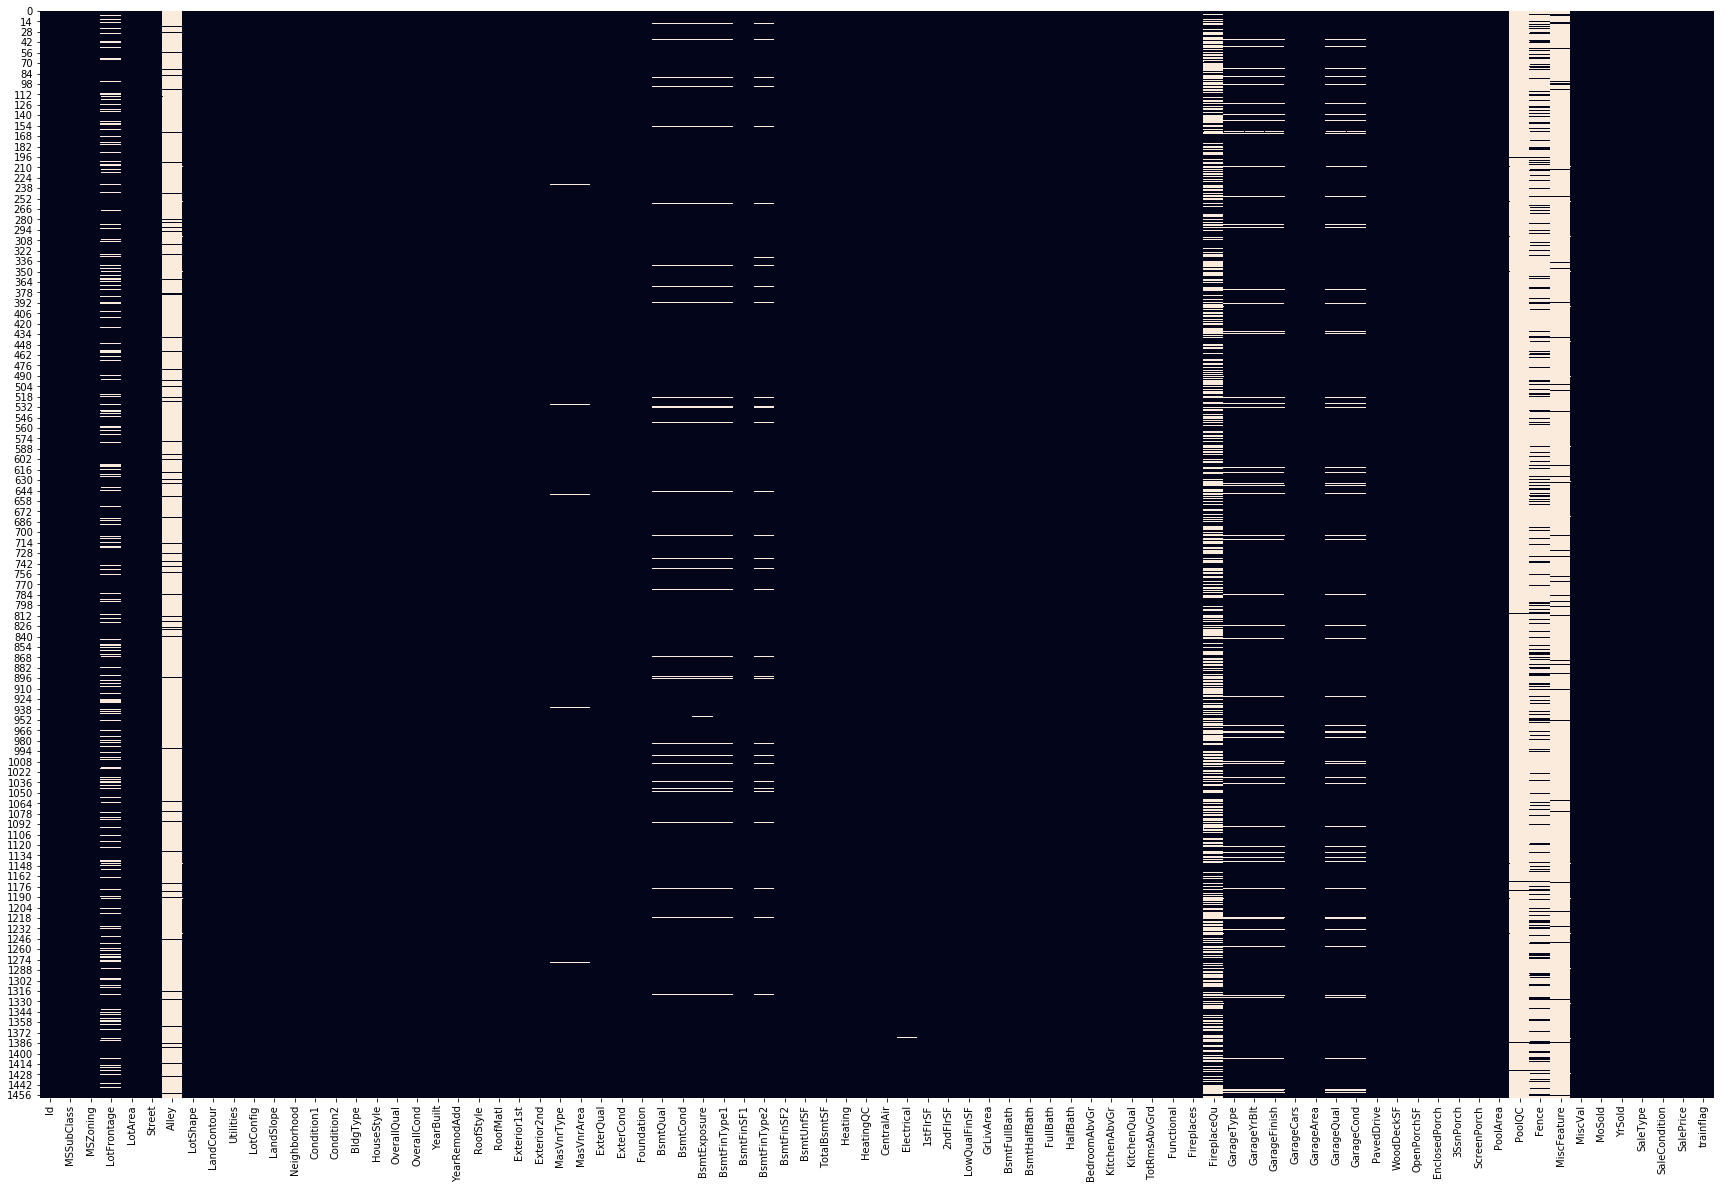

In [10]:
fig, ax=plt.subplots(figsize=(30, 20))
sns.heatmap(data.isnull(), cbar=False)

The missingno correlation heatmap below measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

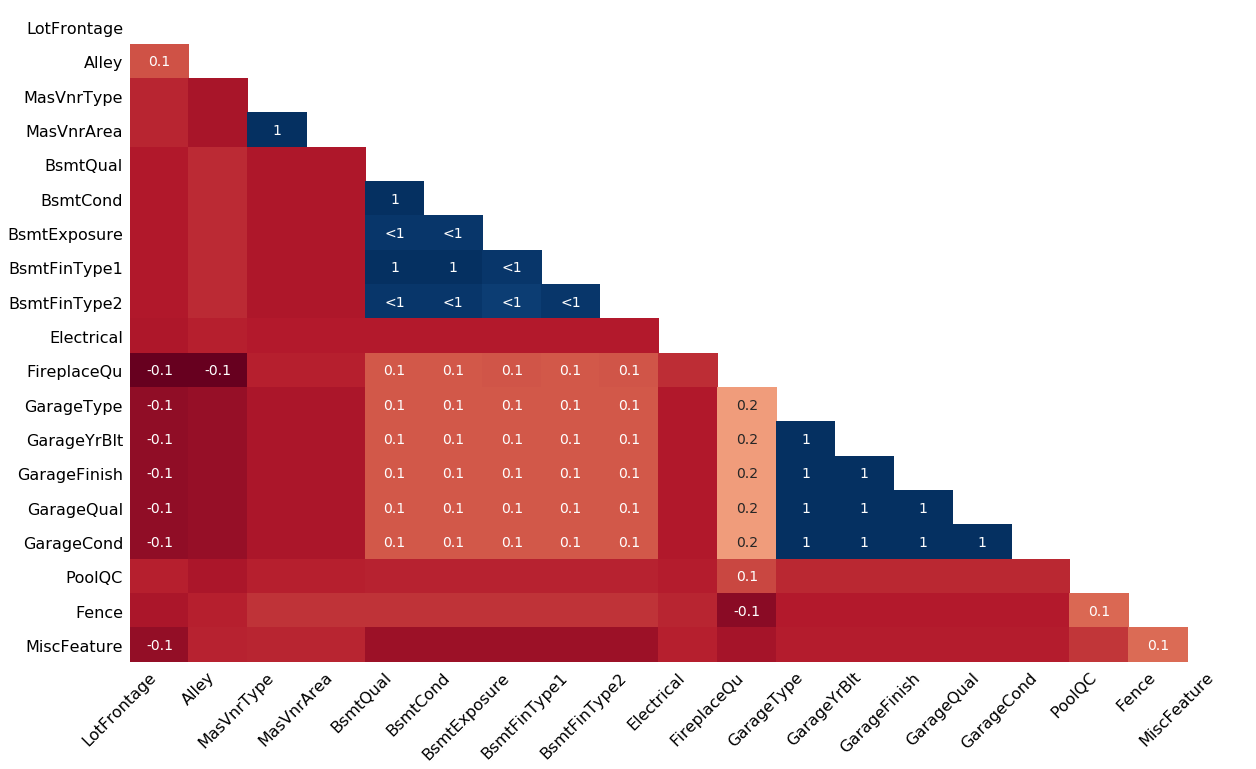

In [11]:
msno.heatmap(data)

It appears as though there is not a lot of correlation between features with NAs, but we can see some strong positive correlation for many features, meaning that when one is present the other is usually present

Lets look at how many features are missing by bar chart

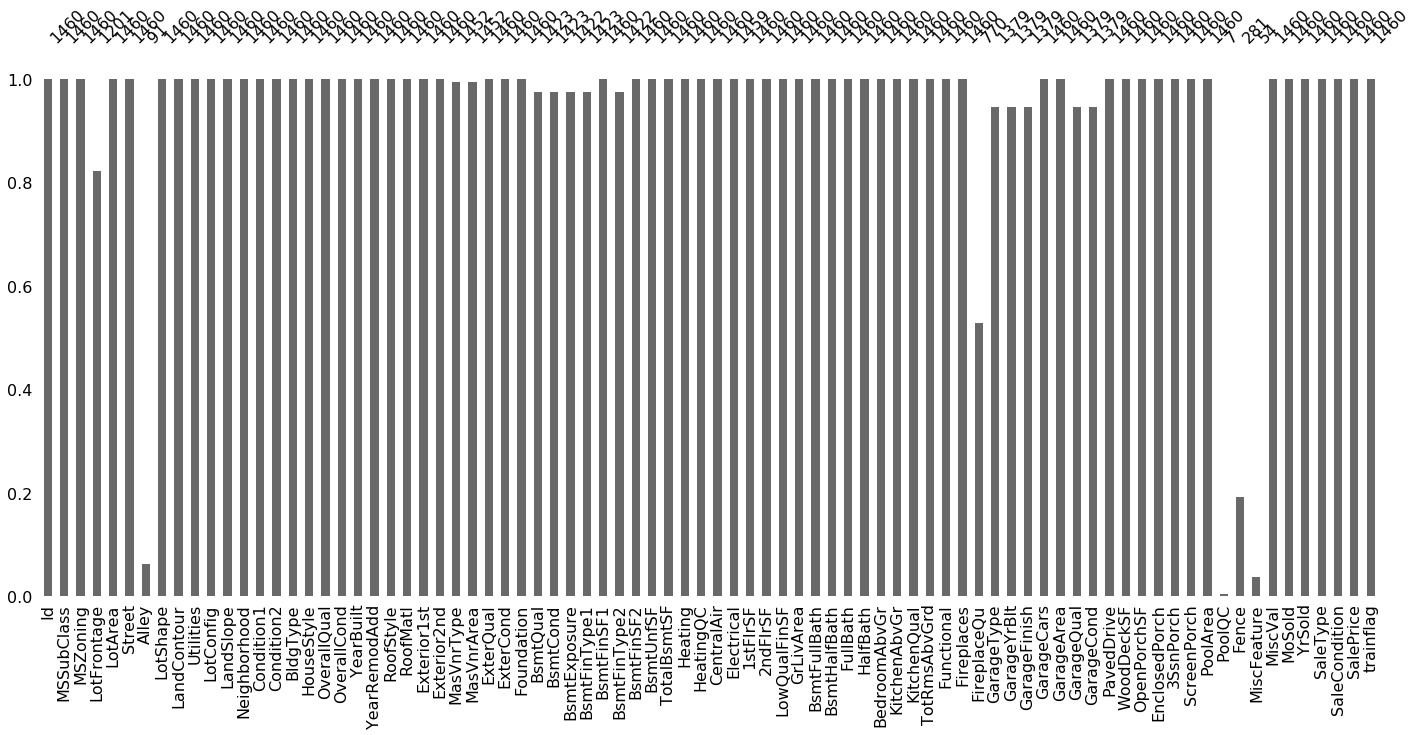

In [12]:
msno.bar(data)

The dendrogram below allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity (for example, as CONTRIBUTING FACTOR VEHICLE 2 and VEHICLE TYPE CODE 2 ought to), then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

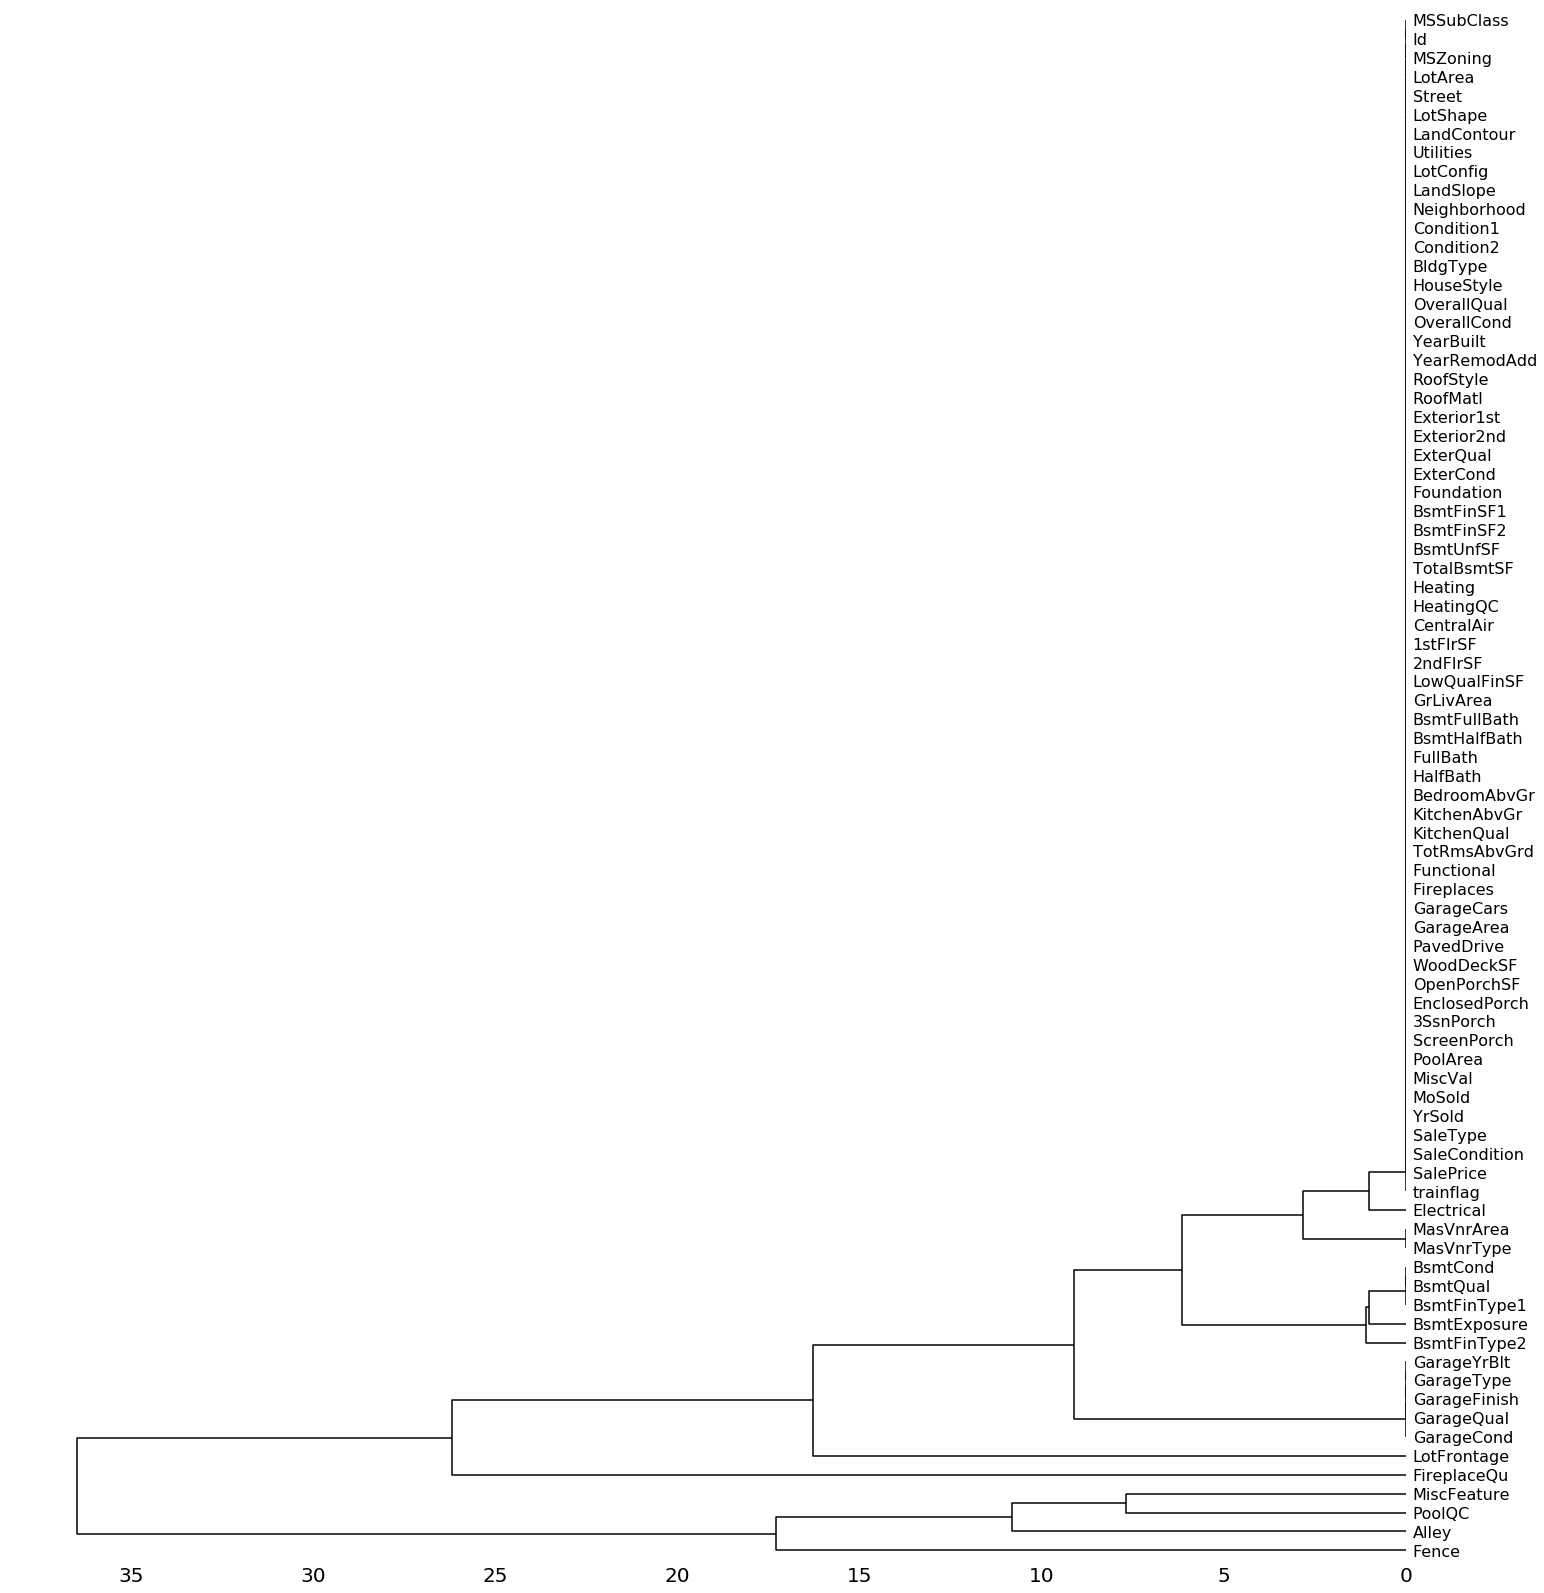

In [13]:
 msno.dendrogram(data)

While this data set has a lot of features, lets see what a correlation heatmap looks like to see if anything jumps out at us from the start

We should probably scale our data before correlating it...

__Correlation__

(39, 39)

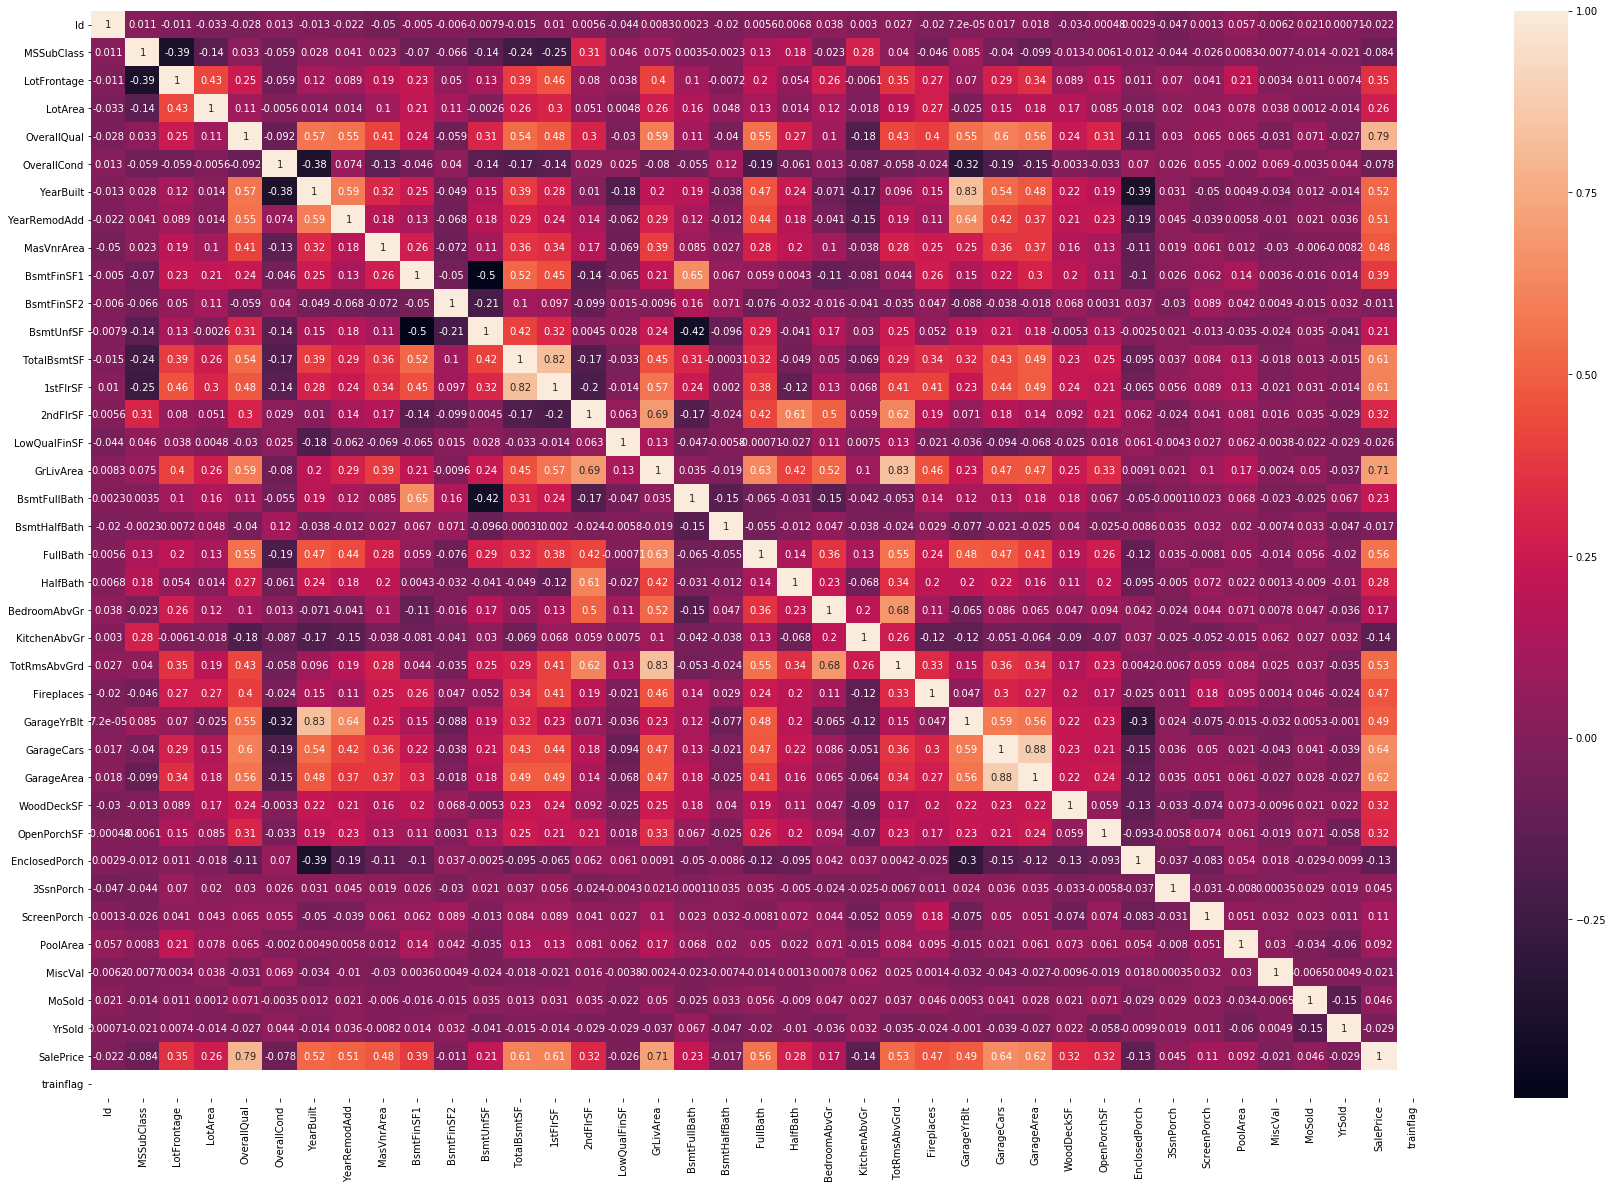

In [14]:
fig, ax=plt.subplots(figsize=(30, 20))
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
corr.shape

Definitely some strong correlations with sales price, looks like several features are correlated with the sales price around or above .50/-.50

- OverallQual (.96)
- GarageArea (.9)
- GarageCars (.9)
- TotalBsmtSF (.82)
- MasVnrArea (.81)
- GrLivArea (.81)
- FullBath (.81)
- 1stFlrSF (.8)
- YearBuilt (.79)
- YearRemodAdd (.76)
- GarageYrBlt (.76)
- Fireplaces (.73)
- TotRmsAbvGrd (.64)
- OpenPorchSF (.61)
- LotFrontage (.6)
- WoodDeckSF (.58)
- BsmtFinSF1 (.52)
- EnclosedPorch (-.48)
- OverallCond (-.47)

There also appear to be some features that correlate highly with one another, like a lot... We should consider removing features that correlate around .95 and above

- GarageCars and GarageArea (.99)
- GrLivArea and TotRmsAbvGrd (.95)
- YearBuilt and GarageYrBlt (.97)
- 1stFlrSF and TotalBsmtSF (.97)

Check for duplicates

In [15]:
cleaning_data.duplicated().sum()

0

# Data Cleaning - Dealing with NAs

In [16]:
na = cleaning_data.isna().sum()
na[na>0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
testflag        1460
trainflag       1459
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
SaleType           1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
TotalBsmtSF        1
KitchenQual        1
GarageCars         1
dtype: int64

In [17]:
cleaning_data[['LotFrontage']].head()

,LotFrontage
0,65.000000000000000000
1,80.000000000000000000
2,68.000000000000000000
3,60.000000000000000000
4,84.000000000000000000


Seems like this is a feature that we could impute values for, the question is how to impute?

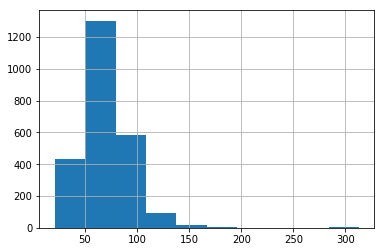

In [18]:
#looks like the data is fairly normally distributed, we should consider imputing the mean
cleaning_data['LotFrontage'].hist()

In [19]:
np.mean(cleaning_data['LotFrontage'])

69.30579531442663

What are the means of LotFrontage by Neighborhood?

In [20]:
LotMean = cleaning_data['LotFrontage'].groupby(cleaning_data['Neighborhood'])

In [21]:
LotMean.mean()

Neighborhood
Blmngtn   46.899999999999998579
Blueste   27.300000000000000711
BrDale    21.500000000000000000
BrkSide   55.789473684210527438
ClearCr   88.150000000000005684
CollgCr   71.336363636363643081
Crawfor   69.951807228915669157
Edwards   66.910112359550566907
Gilbert   74.207207207207204647
IDOTRR    62.241379310344825626
MeadowV   25.606060606060605522
Mitchel   75.144444444444445708
NAmes     75.210666666666668334
NPkVill   28.142857142857142350
NWAmes    81.517647058823527573
NoRidge   91.629629629629633314
NridgHt   84.184049079754601053
OldTown   61.777292576419213788
SWISU     59.068181818181820120
Sawyer    74.551020408163267916
SawyerW   70.669811320754718054
Somerst   64.549382716049379383
StoneBr   62.173913043478258089
Timber    81.157894736842109751
Veenker   72.000000000000000000
Name: LotFrontage, dtype: float64

Lets go ahead and impute the mean for these values based on the mean of Neighborhood (here I am thinking that the houses that occupy the same neighborhood may have roughly the same lot size, I will be looking for a better grouping variable as the data cleaning process continues, but this seems to make sense to me)

In [9]:
cleaning_data['LotFrontage'] = cleaning_data.groupby('Neighborhood').LotFrontage.transform(lambda x: x.replace(np.nan, x.mean()))

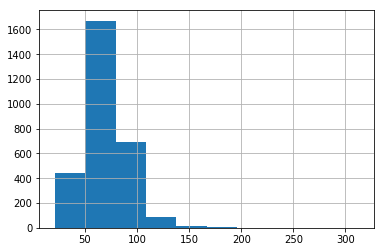

In [23]:
cleaning_data['LotFrontage'].hist()

Continue looking for NaN

The "Alley" feature uses NA to code for no access by alley, we need to rename this so that it is not showing up as an NA

In [24]:
cleaning_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

Replace nan in Alley feature with "No Alley Access"

In [10]:
cleaning_data['Alley'].replace(np.nan, 'No Alley Access', inplace=True)

In [11]:
cleaning_data.Alley.unique()

array(['No Alley Access', 'Grvl', 'Pave'], dtype=object)

Looks like we have successfully recoded our Alley feature, lets move on to FirePlaceQu

Now lets look at BsmtQual (height of the basement in inches)

In [27]:
cleaning_data['BsmtQual'].head()

0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object

In [28]:
cleaning_data['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

We could replace these missing values with the mode?

In [12]:
cleaning_data['BsmtQual'].replace(np.nan, 'TA', inplace=True)

In [30]:
cleaning_data['BsmtQual'].value_counts()

TA    1364
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

Ok, we dealt with those, I wonder if there is a better way to transform this feature? It is only 30 some odd rows though...

In [31]:
cleaning_data[cleaning_data[['BsmtCond']].isna().any(axis=1)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,testflag,trainflag
17,1296,0,0,No Alley Access,2,Duplex,NaN,NaN,0.000000000000000000,0.000000000000000000,NaN,NaN,0.000000000000000000,0.000000000000000000,TA,0.000000000000000000,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,NaN,0,Slab,2,Typ,516.000000000000000000,2.000000000000000000,TA,Unf,TA,CarPort,1967.000000000000000000,1296,0,GasA,TA,1Story,18,2,TA,Lvl,Gtl,10791,Inside,72.000000000000000000,Reg,0,90,RL,0.000000000000000000,None,Shed,500,10,Sawyer,0,5,4,Y,0,NaN,CompShg,Gable,Normal,90000.000000000000000000,WD,0,Pave,6,0.000000000000000000,AllPub,0,1967,1967,2006,nan,0.000000000000000000
39,1152,0,0,No Alley Access,2,Duplex,NaN,NaN,0.000000000000000000,0.000000000000000000,NaN,NaN,0.000000000000000000,0.000000000000000000,TA,0.000000000000000000,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,NaN,NaN,0,PConc,2,Typ,0.000000000000000000,0.000000000000000000,NaN,NaN,NaN,NaN,nan,1152,0,GasA,TA,1Story,40,2,Fa,Lvl,Gtl,6040,Inside,65.000000000000000000,Reg,0,90,RL,0.000000000000000000,None,NaN,0,6,Edwards,0,5,4,N,0,NaN,CompShg,Gable,AdjLand,82000.000000000000000000,WD,0,Pave,6,0.000000000000000000,AllPub,0,1955,1955,2008,nan,0.000000000000000000
90,1040,0,0,No Alley Access,2,1Fam,NaN,NaN,0.000000000000000000,0.000000000000000000,NaN,NaN,0.000000000000000000,0.000000000000000000,TA,0.000000000000000000,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,Wd Sdng,NaN,NaN,0,Slab,1,Typ,420.000000000000000000,2.000000000000000000,TA,Unf,TA,Detchd,1950.000000000000000000,1040,0,GasA,TA,1Story,91,1,TA,Lvl,Gtl,7200,Inside,60.000000000000000000,Reg,0,20,RL,0.000000000000000000,None,NaN,0,7,NAmes,29,5,4,Y,0,NaN,CompShg,Gable,Normal,109900.000000000000000000,WD,0,Pave,4,0.000000000000000000,AllPub,0,1950,1950,2006,nan,0.000000000000000000
102,1535,0,0,No Alley Access,4,Duplex,NaN,NaN,0.000000000000000000,0.000000000000000000,NaN,NaN,0.000000000000000000,0.000000000000000000,TA,0.000000000000000000,Y,Norm,Norm,SBrkr,0,Fa,TA,HdBoard,HdBoard,NaN,NaN,0,Slab,2,Typ,410.000000000000000000,2.000000000000000000,TA,Unf,TA,Attchd,1979.000000000000000000,1535,0,GasA,TA,1Story,103,2,TA,Bnk,Gtl,7018,Inside,64.000000000000000000,Reg,0,90,RL,0.000000000000000000,None,NaN,0,6,SawyerW,0,5,5,Y,0,NaN,CompShg,Gable,Alloca,118964.000000000000000000,WD,0,Pave,8,0.000000000000000000,AllPub,0,1979,1979,2009,nan,0.000000000000000000
156,1040,0,0,No Alley Access,2,1Fam,NaN,NaN,0.000000000000000000,0.000000000000000000,NaN,NaN,0.000000000000000000,0.000000000000000000,TA,0.000000000000000000,Y,Norm,Norm,FuseF,0,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,625.000000000000000000,2.000000000000000000,TA,Unf,TA,Detchd,1950.000000000000000000,1040,0,GasA,TA,1Story,157,1,TA,Lvl,Gtl,7200,Inside,60.000000000000000000,Reg,0,20,RL,0.000000000000000000,None,NaN,0,6,NAmes,0,7,5,Y,0,NaN,CompShg,Hip,Normal,109500.000000000000000000,WD,0,Pave,5,0.000000000000000000,AllPub,0,1950,1950,2006,nan,0.000000000000000000
182,1340,0,180,No Alley Access,3,1Fam,NaN,NaN,0.000000000000000000,0.000000000000000000,NaN,NaN,0.000000000000000000,0.000000000000000000,TA,0.000000000000000000,Y,Artery,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,MnPrv,Gd,1,PConc,1,Typ,252.000000000000000000,1.00

In [32]:
cleaning_data['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

We could replace the missing values with the mode in this feature as well

In [13]:
cleaning_data['BsmtCond'].replace(np.nan, 'TA', inplace=True)

Now lets look at BsmtExposure

In [34]:
cleaning_data['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

We could impute the mode here again, seems to be a pattern with basement features, not really sure how else to deal with them

In [14]:
cleaning_data['BsmtExposure'].replace(np.nan, 'No', inplace=True)

Now lets look at BsmtFinType1

In [36]:
cleaning_data['BsmtFinType1'].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

Lets investigate what the basement features look like before we keep cleaning the NAs, we can potentially get rid of some of these in favor of keeping the overall rating of the basement finished area

In [37]:
cleaning_data.groupby(['BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtExposure']).size()

BsmtFinType1  BsmtCond  BsmtQual  BsmtExposure
ALQ           Fa        Fa        No                1
                        Gd        Mn                1
                                  No                2
                        TA        Mn                1
                                  No                1
              Gd        Ex        No                1
                        Gd        Av                2
                                  Gd                2
                                  No                7
                        TA        Av                2
                                  Gd                1
                                  No                3
              TA        Ex        Av                1
                                  No                2
                        Fa        Gd                1
                                  Mn                1
                                  No                3
                        Gd        A

In [38]:
cleaning_data.groupby(['BsmtFinType1', 'BsmtFinType2']).size()

BsmtFinType1  BsmtFinType2
ALQ           BLQ              30
              GLQ               3
              LwQ              27
              Rec              36
              Unf             333
BLQ           ALQ               4
              BLQ               1
              GLQ              10
              LwQ              23
              Rec              34
              Unf             197
GLQ           ALQ              15
              BLQ               7
              LwQ              17
              Rec              19
              Unf             790
LwQ           ALQ              14
              BLQ              11
              GLQ              14
              Rec              16
              Unf              99
Rec           ALQ              19
              BLQ              19
              GLQ               7
              LwQ              20
              Unf             223
Unf           Unf             851
dtype: int64

These two features seem to be different from one another

__So, heres a thought, lets continue cleaning the NAs in all these categories, and then we can run the model without some of these features to see if the performance improves, don't want to arbitrarily throw out any features without knowing how they affect the model__

In [39]:
cleaning_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

Lets replace the missing rows with the most frequent value again

In [15]:
cleaning_data['BsmtFinType1'].replace(np.nan, 'Unf', inplace=True)

Lets impute the most frequent feature for our BsmtFinType2

In [41]:
cleaning_data['BsmtFinType2'].value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [16]:
cleaning_data['BsmtFinType2'].replace(np.nan, 'Unf', inplace=True)

Lets look at Electrical

In [43]:
cleaning_data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

Lets just replace the missing value with the SBrkr

In [17]:
cleaning_data['Electrical'].replace(np.nan, 'SBrkr', inplace=True)

Lets look at FireplaceQu (quality of fireplace)

In [45]:
cleaning_data['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

Since there are almost half of these values missing from the data, we will remove this feature

In [18]:
cleaning_data.drop('FireplaceQu', axis=1, inplace=True)

Now lets look at BsmtFinSF1

In [47]:
cleaning_data[cleaning_data[['BsmtFinSF1']].isna().any(axis=1)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,testflag,trainflag
660,896,0,0,No Alley Access,2,1Fam,TA,No,nan,nan,Unf,Unf,nan,nan,TA,nan,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,0,PConc,1,Typ,280.000000000000000000,1.000000000000000000,TA,Unf,TA,Detchd,1946.000000000000000000,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,99.000000000000000000,IR1,0,20,RM,0.000000000000000000,None,NaN,0,4,BrkSide,0,7,4,Y,0,NaN,CompShg,Gable,Abnorml,nan,ConLD,0,Pave,4,nan,AllPub,0,1946,1950,2008,1.000000000000000000,nan


Lets just impute the mean value here

In [19]:
cleaning_data['BsmtFinSF1'].replace(np.nan, np.mean(cleaning_data['BsmtFinSF1']), inplace=True)

Lets impute the mean value for the missing value in BsmtFinSF2

In [20]:
cleaning_data['BsmtFinSF2'].replace(np.nan, np.mean(cleaning_data['BsmtFinSF2']), inplace=True)

Now lets look at BsmtFullBath

In [50]:
cleaning_data[cleaning_data[['BsmtFullBath']].isna().any(axis=1)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,testflag,trainflag
660,896,0,0,No Alley Access,2,1Fam,TA,No,441.423235092529125723,49.582248115147358192,Unf,Unf,nan,nan,TA,nan,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,0,PConc,1,Typ,280.000000000000000000,1.000000000000000000,TA,Unf,TA,Detchd,1946.000000000000000000,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,99.000000000000000000,IR1,0,20,RM,0.000000000000000000,None,NaN,0,4,BrkSide,0,7,4,Y,0,NaN,CompShg,Gable,Abnorml,nan,ConLD,0,Pave,4,nan,AllPub,0,1946,1950,2008,1.000000000000000000,nan
728,3820,0,0,No Alley Access,5,1Fam,TA,No,0.000000000000000000,0.000000000000000000,Unf,Unf,nan,nan,TA,0.000000000000000000,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,2,Slab,3,Typ,624.000000000000000000,2.000000000000000000,TA,Unf,TA,Attchd,1959.000000000000000000,3820,1,GasA,TA,1Story,2189,1,Ex,Lvl,Gtl,47007,Inside,123.000000000000000000,IR1,0,20,RL,0.000000000000000000,None,NaN,0,7,Edwards,372,7,5,Y,0,NaN,CompShg,Gable,Normal,nan,WD,0,Pave,11,0.000000000000000000,AllPub,0,1959,1996,2008,1.000000000000000000,nan


In [51]:
cleaning_data['BsmtFullBath'].value_counts()

0.000000000000000000    1705
1.000000000000000000    1172
2.000000000000000000      38
3.000000000000000000       2
Name: BsmtFullBath, dtype: int64

Seems like we need to impute the mode for this one as well since the mean will be a float

In [21]:
cleaning_data.BsmtFullBath.replace(np.nan, 0, inplace=True)

We should do the same thing for BsmtHalfBath, there are only 2 data points

In [53]:
cleaning_data.BsmtHalfBath.value_counts()

0.000000000000000000    2742
1.000000000000000000     171
2.000000000000000000       4
Name: BsmtHalfBath, dtype: int64

In [22]:
cleaning_data.BsmtHalfBath.replace(np.nan, 0, inplace=True)

Now lets look at BsmtUnfSF

In [55]:
cleaning_data[cleaning_data[['BsmtUnfSF']].isna().any(axis=1)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,testflag,trainflag
660,896,0,0,No Alley Access,2,1Fam,TA,No,441.423235092529125723,49.582248115147358192,Unf,Unf,0.000000000000000000,0.000000000000000000,TA,nan,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,0,PConc,1,Typ,280.000000000000000000,1.000000000000000000,TA,Unf,TA,Detchd,1946.000000000000000000,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,99.000000000000000000,IR1,0,20,RM,0.000000000000000000,None,NaN,0,4,BrkSide,0,7,4,Y,0,NaN,CompShg,Gable,Abnorml,nan,ConLD,0,Pave,4,nan,AllPub,0,1946,1950,2008,1.000000000000000000,nan


In [56]:
np.mean(cleaning_data['BsmtUnfSF'])

560.7721041809458

C:\Users\Sam Cannon\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



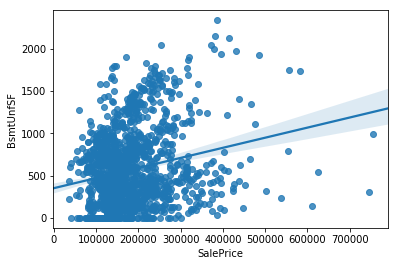

In [57]:
sns.regplot(data= cleaning_data, x='SalePrice', y='BsmtUnfSF')

In [23]:
cleaning_data.BsmtUnfSF.replace(np.nan, np.mean(cleaning_data.BsmtUnfSF), inplace=True)

Now lets look at Exterior1st

In [59]:
cleaning_data.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

Again, notice a pattern? go ahead and impute the mode

In [24]:
cleaning_data.Exterior1st.replace(np.nan, 'VinylSd', inplace=True)

Now lets do the same thing with Exterior2nd

In [61]:
cleaning_data.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [25]:
cleaning_data.Exterior2nd.replace(np.nan, 'VinylSd', inplace=True)

Now we can look at Fence, this feature is coded as either having a fence or not having a fence, the missing values just mean that there is no fence, so lets fix that

In [63]:
cleaning_data.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [26]:
cleaning_data.Fence.replace(np.nan, 'No Fence Here!', inplace=True)

Lets fix Functional now

In [65]:
cleaning_data.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [27]:
cleaning_data.Functional.replace(np.nan, 'Typ', inplace=True)

Now lets look at GarageArea

In [67]:
cleaning_data.GarageArea.mean()

472.8745716244003

Impute the mean

In [28]:
cleaning_data.GarageArea.replace(np.nan, np.mean(cleaning_data.GarageArea), inplace=True)

Now lets look at GarageCars

In [69]:
cleaning_data.GarageCars.value_counts()

2.000000000000000000    1594
1.000000000000000000     776
3.000000000000000000     374
0.000000000000000000     157
4.000000000000000000      16
5.000000000000000000       1
Name: GarageCars, dtype: int64

In [29]:
#replace with the mode
cleaning_data.GarageCars.replace(np.nan, 2, inplace=True)

Now lets look at GarageCond

In [71]:
cleaning_data.GarageCond.value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [30]:
#replace with the mode
cleaning_data.GarageCond.replace(np.nan, 'TA', inplace=True)

Now lets look at GarageType, probably just going to impute the mode again...

In [73]:
cleaning_data['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [31]:
cleaning_data['GarageType'].replace(np.nan, 'Attchd', inplace=True)

Lets look at GarageYrBlt now

Whats the median?

In [75]:
cleaning_data['GarageYrBlt'].median()

1979.0

Whats the distribution look like?

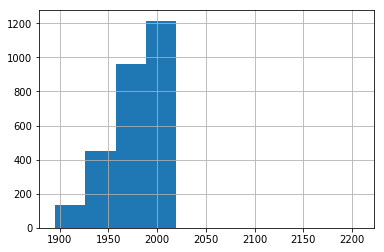

In [76]:
cleaning_data['GarageYrBlt'].hist()

Hmm, lets see if theres any tie between year built and overall condition

In [77]:
year_mean = cleaning_data['GarageYrBlt'].groupby(cleaning_data['OverallCond'])

In [78]:
year_mean.mean()

OverallCond
1   1910.000000000000000000
2   1952.500000000000000000
3   1957.277777777777828305
4   1960.833333333333257542
5   1989.706289308176110353
6   1965.372509960159277398
7   1961.607734806629878221
8   1956.147058823529505389
9   1966.371428571428623400
Name: GarageYrBlt, dtype: float64

Really interesting results here, the newest average has worse quality than some of the older houses... Lets impute the mean year for the garage being built by the overall condition of the house

In [32]:
cleaning_data['GarageYrBlt'] = cleaning_data.groupby('OverallCond').GarageYrBlt.transform(lambda x: x.replace(np.nan, x.mean()))

In [33]:
data['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

Now lets look at GarageFinish

In [81]:
cleaning_data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

So, it appears that the NA valus in this feature mean that there is no garage, so lets recode those to "no garage"

In [34]:
cleaning_data['GarageFinish'].replace(np.nan, 'no garage', inplace=True)

Lets check out GarageQual and GarageCond now

It appears as though these features may be redundant, I am going to remove GarageQual and retain GarageCond, I am also going to replace the NA values in this feature with "no garage" since the NA values mean just that

In [35]:
cleaning_data.drop('GarageQual', axis=1, inplace=True)
cleaning_data['GarageCond'].replace(np.nan, 'no garage', inplace=True)

Lets look at KitchenQual

In [84]:
cleaning_data.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

Impute the mode

In [36]:
cleaning_data.KitchenQual.replace(np.nan, 'TA', inplace=True)

Now lets look at MSZoning

In [86]:
cleaning_data.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Impute the mode

In [37]:
cleaning_data.MSZoning.replace(np.nan, 'RL', inplace=True)

Now lets look at the MasVnr features

In [88]:
cleaning_data[cleaning_data[['MasVnrType']].isnull().any(axis=1)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,testflag,trainflag
234,860,1100,0,No Alley Access,4,1Fam,TA,No,625.000000000000000000,0.000000000000000000,GLQ,Unf,1.000000000000000000,0.000000000000000000,Gd,235.000000000000000000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,No Fence Here!,2,PConc,2,Typ,440.000000000000000000,2.000000000000000000,TA,Fin,BuiltIn,2002.000000000000000000,1960,1,GasA,Ex,2Story,235,1,Gd,Lvl,Gtl,7851,Inside,74.207207207207204647,Reg,0,60,RL,nan,NaN,NaN,0,5,Gilbert,48,5,6,Y,0,NaN,CompShg,Gable,Normal,216500.000000000000000000,WD,0,Pave,8,860.000000000000000000,AllPub,288,2002,2002,2010,nan,0.000000000000000000
529,2515,0,0,No Alley Access,4,1Fam,TA,No,1219.000000000000000000,0.000000000000000000,Rec,Unf,1.000000000000000000,0.000000000000000000,TA,816.000000000000000000,Y,Norm,Norm,SBrkr,200,TA,Gd,Wd Sdng,Stone,No Fence Here!,2,PConc,3,Maj1,484.000000000000000000,2.000000000000000000,TA,RFn,Attchd,1975.000000000000000000,2515,0,GasA,TA,1Story,530,2,TA,Lvl,Gtl,32668,CulDSac,69.951807228915669157,IR1,0,20,RL,nan,NaN,NaN,0,3,Crawfor,0,3,6,Y,0,NaN,CompShg,Hip,Alloca,200624.000000000000000000,WD,0,Pave,9,2035.000000000000000000,AllPub,0,1957,1975,2007,nan,0.000000000000000000
650,822,843,0,No Alley Access,3,1Fam,TA,No,0.000000000000000000,0.000000000000000000,Unf,Unf,0.000000000000000000,0.000000000000000000,Gd,813.000000000000000000,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,No Fence Here!,0,PConc,2,Typ,562.000000000000000000,2.000000000000000000,TA,RFn,Attchd,2007.000000000000000000,1665,1,GasA,Ex,2Story,651,1,Gd,Lvl,Gtl,8125,Inside,65.000000000000000000,Reg,0,60,FV,nan,NaN,NaN,0,5,Somerst,0,6,7,Y,0,NaN,CompShg,Gable,Normal,205950.000000000000000000,WD,0,Pave,7,813.000000000000000000,AllPub,0,2007,2007,2008,nan,0.000000000000000000
936,1200,0,0,No Alley Access,2,1Fam,TA,No,833.000000000000000000,0.000000000000000000,GLQ,Unf,1.000000000000000000,0.000000000000000000,Gd,343.000000000000000000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,No Fence Here!,0,PConc,2,Typ,555.000000000000000000,2.000000000000000000,TA,RFn,Attchd,2003.000000000000000000,1200,0,GasA,Ex,1Story,937,1,Gd,Lvl,Gtl,10083,Inside,67.000000000000000000,Reg,0,20,RL,nan,NaN,NaN,0,8,SawyerW,41,5,7,Y,0,NaN,CompShg,Gable,Normal,184900.000000000000000000,WD,0,Pave,5,1176.000000000000000000,AllPub,0,2003,2003,2009,nan,0.000000000000000000
973,1428,0,0,No Alley Access,3,1Fam,TA,No,0.000000000000000000,0.000000000000000000,Unf,Unf,0.000000000000000000,0.000000000000000000,Gd,1428.000000000000000000,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,No Fence Here!,0,PConc,2,Typ,480.000000000000000000,2.000000000000000000,TA,Fin,Attchd,2007.000000000000000000,1428,0,GasA,Ex,1Story,974,1,Gd,Lvl,Gtl,11639,Corner,95.000000000000000000,Reg,0,20,FV,nan,NaN,NaN,0,12,Somerst,120,5,7,Y,0,NaN,CompShg,Gable,Partial,182000.000000000000000000,New,0,Pave,6,1428.000000000000000000,AllPub,0,2007,2008,2008,nan,0.000000000000000000
977,1241,0,0,Pave,1,TwnhsE,TA,No,1106.000000000000000000,0.000000000000000000,GLQ,Unf,1.000000000000000000,0.000000000000000000,Gd,135.000000000000000000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,No Fence Here!,0,PConc,1,Typ,569.000000000000000000,2.000000000000000000,TA,Fin,Attchd,200

In [89]:
cleaning_data[['MasVnrType']].head()
cleaning_data['MasVnrType'].unique()

,MasVnrType
0,BrkFace
1,None
2,BrkFace
3,None
4,BrkFace


array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

Looks like we will have to replace NA values with our "unknown" tag perhaps, since there doesn't appear to be a feature that is similar to this that we can infer the answer from

In [38]:
cleaning_data['MasVnrType'].replace(np.nan, 'unknown', inplace=True)

Now look at MasVnrArea

These are highly unique values, lets replace these missing values with the average based on Exterior1st (the idea being here that we have areas that are common to veneer types perhaps)

In [91]:
exterior_mean = cleaning_data['MasVnrArea'].groupby(cleaning_data['Exterior1st'])

In [92]:
exterior_mean.mean()

Exterior1st
AsbShng    20.522727272727273373
AsphShn     0.000000000000000000
BrkComm     0.000000000000000000
BrkFace     2.494252873563218564
CBlock      0.000000000000000000
CemntBd   151.634146341463406316
HdBoard   126.986425339366519438
ImStucc     0.000000000000000000
MetalSd    88.515555555555550882
Plywood    93.479638009049779157
Stone       0.000000000000000000
Stucco     81.790697674418609608
VinylSd   130.414682539682530660
Wd Sdng    53.485365853658535684
WdShing    48.745454545454542483
Name: MasVnrArea, dtype: float64

In [93]:
cleaning_data['MasVnrArea'].mean()

102.20131215469613

In [39]:
cleaning_data['MasVnrArea'] = cleaning_data.groupby('Exterior1st').MasVnrArea.transform(lambda x: x.replace(np.nan, x.mean()))

Now lets look at MiscFeature, this feature is simply a list of things that were not covered in other feature categories, the missing values here simply mean nothin, lets recode these as nothing

In [40]:
cleaning_data.MiscFeature.replace(np.nan, 'Nothing', inplace=True)

PoolQC's missing data simply mean that there is no pool on the property, lets code this properly

In [41]:
cleaning_data.PoolQC.replace(np.nan, 'No Pool', inplace=True)

Lets look at saletype now, recode with the mode 

In [97]:
cleaning_data.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [42]:
cleaning_data.SaleType.replace(np.nan, 'WD', inplace=True)

Now lets look at TotalBsmtSF

In [99]:
cleaning_data.TotalBsmtSF.median()

989.5

In [43]:
cleaning_data.TotalBsmtSF.replace(np.nan, np.mean(cleaning_data.TotalBsmtSF), inplace=True)

Now lets look at Utilities

In [101]:
cleaning_data.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [44]:
#replace with the mode
cleaning_data.Utilities.replace(np.nan, 'AllPub', inplace=True)

We forgot TotalBsmtSF!!!!

In [103]:
cleaning_data.TotalBsmtSF.mean()

1051.7775873886224

In [45]:
cleaning_data.TotalBsmtSF.replace(np.nan, np.mean(cleaning_data.TotalBsmtSF), inplace=True)

__Look at numeric features to see if we can normalize some of them__

C:\Users\Sam Cannon\Python\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DB9CADB8D0>,
      dtype=object)

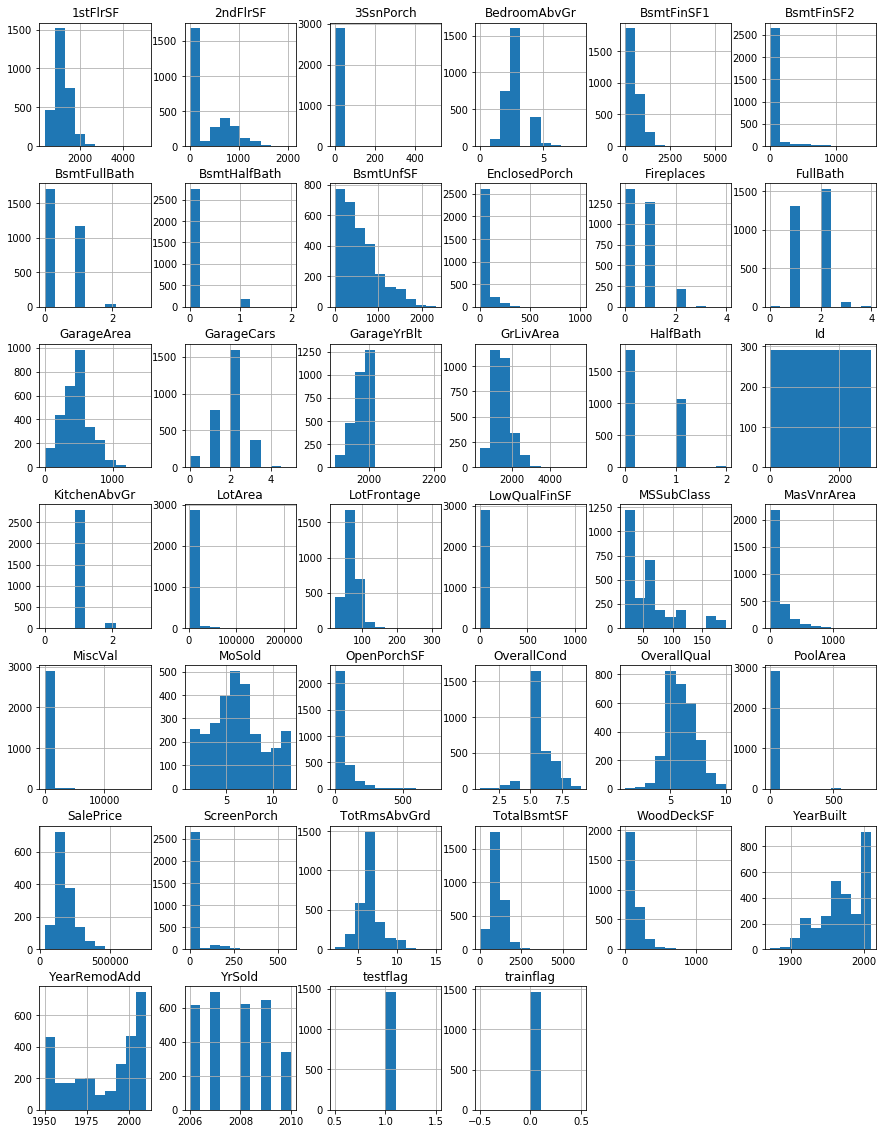

In [105]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
cleaning_data.hist(ax=ax)


Lets start with first floor square feet
- looks like we should transform this 

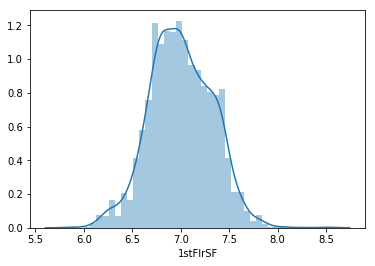

In [106]:
sns.distplot(np.log(cleaning_data['1stFlrSF']))

In [46]:
cleaning_data['1stFlrSF'] = np.log(cleaning_data['1stFlrSF'])

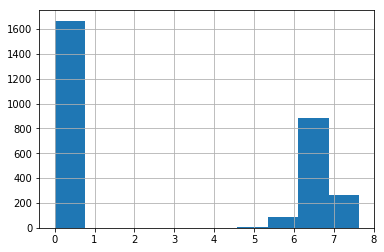

In [108]:
np.log(cleaning_data['2ndFlrSF'] + 1).hist()

Lets look at the basement finished square feet

In [109]:
# #again, some of these houses have no basement, so we cannot transform this
# cleaning_data['BsmtFinSF1']

Looking at Garage Living Area
- We should transform this

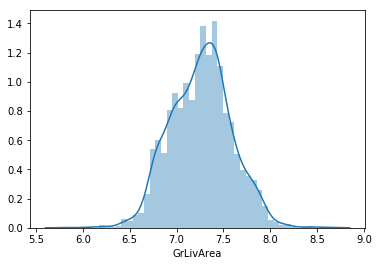

In [110]:
sns.distplot(np.log(cleaning_data['GrLivArea']))

In [47]:
cleaning_data['GrLivArea'] = np.log(cleaning_data['GrLivArea'])

Look at Lot Area
- We should transform this

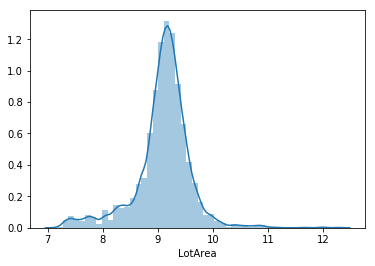

In [112]:
sns.distplot(np.log(cleaning_data['LotArea']))

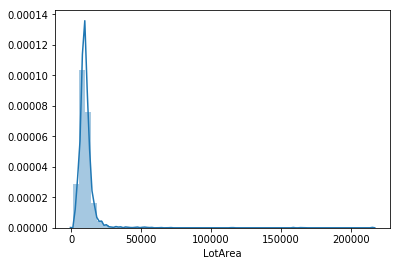

In [113]:
sns.distplot(cleaning_data['LotArea'])

In [48]:
cleaning_data['LotArea'] = np.log(cleaning_data['LotArea'])

Look at Lot Frontage now
- We should transform this

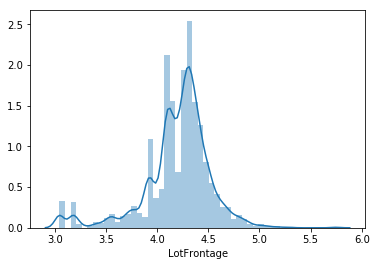

In [115]:
sns.distplot(np.log(cleaning_data['LotFrontage']))

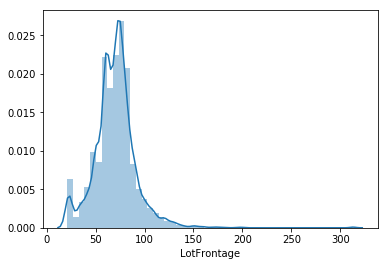

In [116]:
sns.distplot(cleaning_data['LotFrontage'])

In [49]:
cleaning_data['LotFrontage'] = np.log(cleaning_data['LotFrontage'])

# Feature Creation

In [118]:
cleaning_data.YearBuilt.head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

In [119]:
cleaning_data.MoSold.head()

0     2
1     5
2     9
3     2
4    12
Name: MoSold, dtype: int64

In [120]:
np.max(cleaning_data['YearBuilt'])

2010

In [50]:
cleaning_data['HomeAge'] = 2019 - cleaning_data['YearBuilt']

In [122]:
cleaning_data['HomeAge'].head()

0     16
1     43
2     18
3    104
4     19
Name: HomeAge, dtype: int64

__Creating a Home Total Square Feet feature__

In [51]:
cleaning_data['HomeSF'] = (cleaning_data['3SsnPorch'] + cleaning_data['TotalBsmtSF'] + cleaning_data['GrLivArea'] + 
                            cleaning_data['GarageArea'] + cleaning_data['WoodDeckSF'] + cleaning_data['OpenPorchSF'] +
                            cleaning_data['EnclosedPorch'] + cleaning_data['ScreenPorch']) 
                           


__Create a years since remodeled feature__

In [52]:
cleaning_data['years_since_remodel'] = cleaning_data['YrSold'] - cleaning_data['YearRemodAdd']

__Create an overall grade feature__

In [53]:
cleaning_data['OverallGrade'] = cleaning_data['OverallCond'] * cleaning_data['OverallQual']

__Binarize either/or features__

In [54]:
cleaning_data['CentralAir'] = cleaning_data['CentralAir'].map({'Y':1, 'N':0})

In [127]:
cleaning_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,testflag,trainflag,HomeAge,HomeSF,years_since_remodel,OverallGrade
0,6.752270376141741970,854,0,No Alley Access,3,1Fam,TA,No,706.000000000000000000,0.000000000000000000,GLQ,Unf,1.000000000000000000,0.000000000000000000,Gd,150.000000000000000000,1,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,No Fence Here!,0,PConc,2,Typ,548.000000000000000000,2.000000000000000000,TA,RFn,Attchd,2003.000000000000000000,7.444248649496705283,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,9.041921720351218994,Inside,4.174387269895636798,Reg,0,60,RL,196.000000000000000000,BrkFace,Nothing,0,2,CollgCr,61,5,7,Y,0,No Pool,CompShg,Gable,Normal,208500.000000000000000000,WD,0,Pave,8,856.000000000000000000,AllPub,0,2003,2003,2008,nan,0.000000000000000000,16,1472.444248649496785220,5,35
1,7.140453043101158137,0,0,No Alley Access,3,1Fam,TA,Gd,978.000000000000000000,0.000000000000000000,ALQ,Unf,0.000000000000000000,1.000000000000000000,Gd,284.000000000000000000,1,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,No Fence Here!,1,CBlock,2,Typ,460.000000000000000000,2.000000000000000000,TA,RFn,Attchd,1976.000000000000000000,7.140453043101158137,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9.169518377455927904,FR2,4.382026634673881205,Reg,0,20,RL,0.000000000000000000,None,Nothing,0,5,Veenker,0,8,6,Y,0,No Pool,CompShg,Gable,Normal,181500.000000000000000000,WD,0,Pave,6,1262.000000000000000000,AllPub,298,1976,1976,2007,nan,0.000000000000000000,43,2027.140453043101160802,31,48
2,6.824373670043086371,866,0,No Alley Access,3,1Fam,TA,Mn,486.000000000000000000,0.000000000000000000,GLQ,Unf,1.000000000000000000,0.000000000000000000,Gd,434.000000000000000000,1,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,No Fence Here!,1,PConc,2,Typ,608.000000000000000000,2.000000000000000000,TA,RFn,Attchd,2001.000000000000000000,7.487733761436444091,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,9.328123407632565645,Inside,4.219507705176106960,IR1,0,60,RL,162.000000000000000000,BrkFace,Nothing,0,9,CollgCr,42,5,7,Y,0,No Pool,CompShg,Gable,Normal,223500.000000000000000000,WD,0,Pave,6,920.000000000000000000,AllPub,0,2001,2002,2008,nan,0.000000000000000000,18,1577.487733761436402347,6,35
3,6.867974408970292544,756,0,No Alley Access,3,1Fam,Gd,No,216.000000000000000000,0.000000000000000000,ALQ,Unf,1.000000000000000000,0.000000000000000000,TA,540.000000000000000000,1,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,No Fence Here!,1,BrkTil,1,Typ,642.000000000000000000,3.000000000000000000,TA,Unf,Detchd,1998.000000000000000000,7.448333860897475844,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9.164296433474776293,Corner,4.094344562222100414,IR1,0,70,RL,0.000000000000000000,None,Nothing,0,2,Crawfor,35,5,7,Y,0,No Pool,CompShg,Gable,Abnorml,140000.000000000000000000,WD,0,Pave,7,756.000000000000000000,AllPub,0,1915,1970,2006,nan,0.000000000000000000,104,1712.448333860897491832,36,35
4,7.043159915988340458,1053,0,No Alley Access,4,1Fam,TA,Av,655.000000000000000000,0.000000000000000000,GLQ,Unf,1.000000000000000000,0.000000000000000000,Gd,490.000000000000000000,1,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,No Fence Here!,1,PConc,2,Typ,836.000000000000000000,3.000000000000000000,TA,RFn,Attchd,2000.000000000000000000,7.695303134963566549,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,9.56521

__Frequency Encoding__

In [128]:
# encoder = cleaning_data.groupby('Alley').size()
# encode = encoder/len(cleaning_data)
# cleaning_data['Alley'] = cleaning_data.Alley.map(encoder)

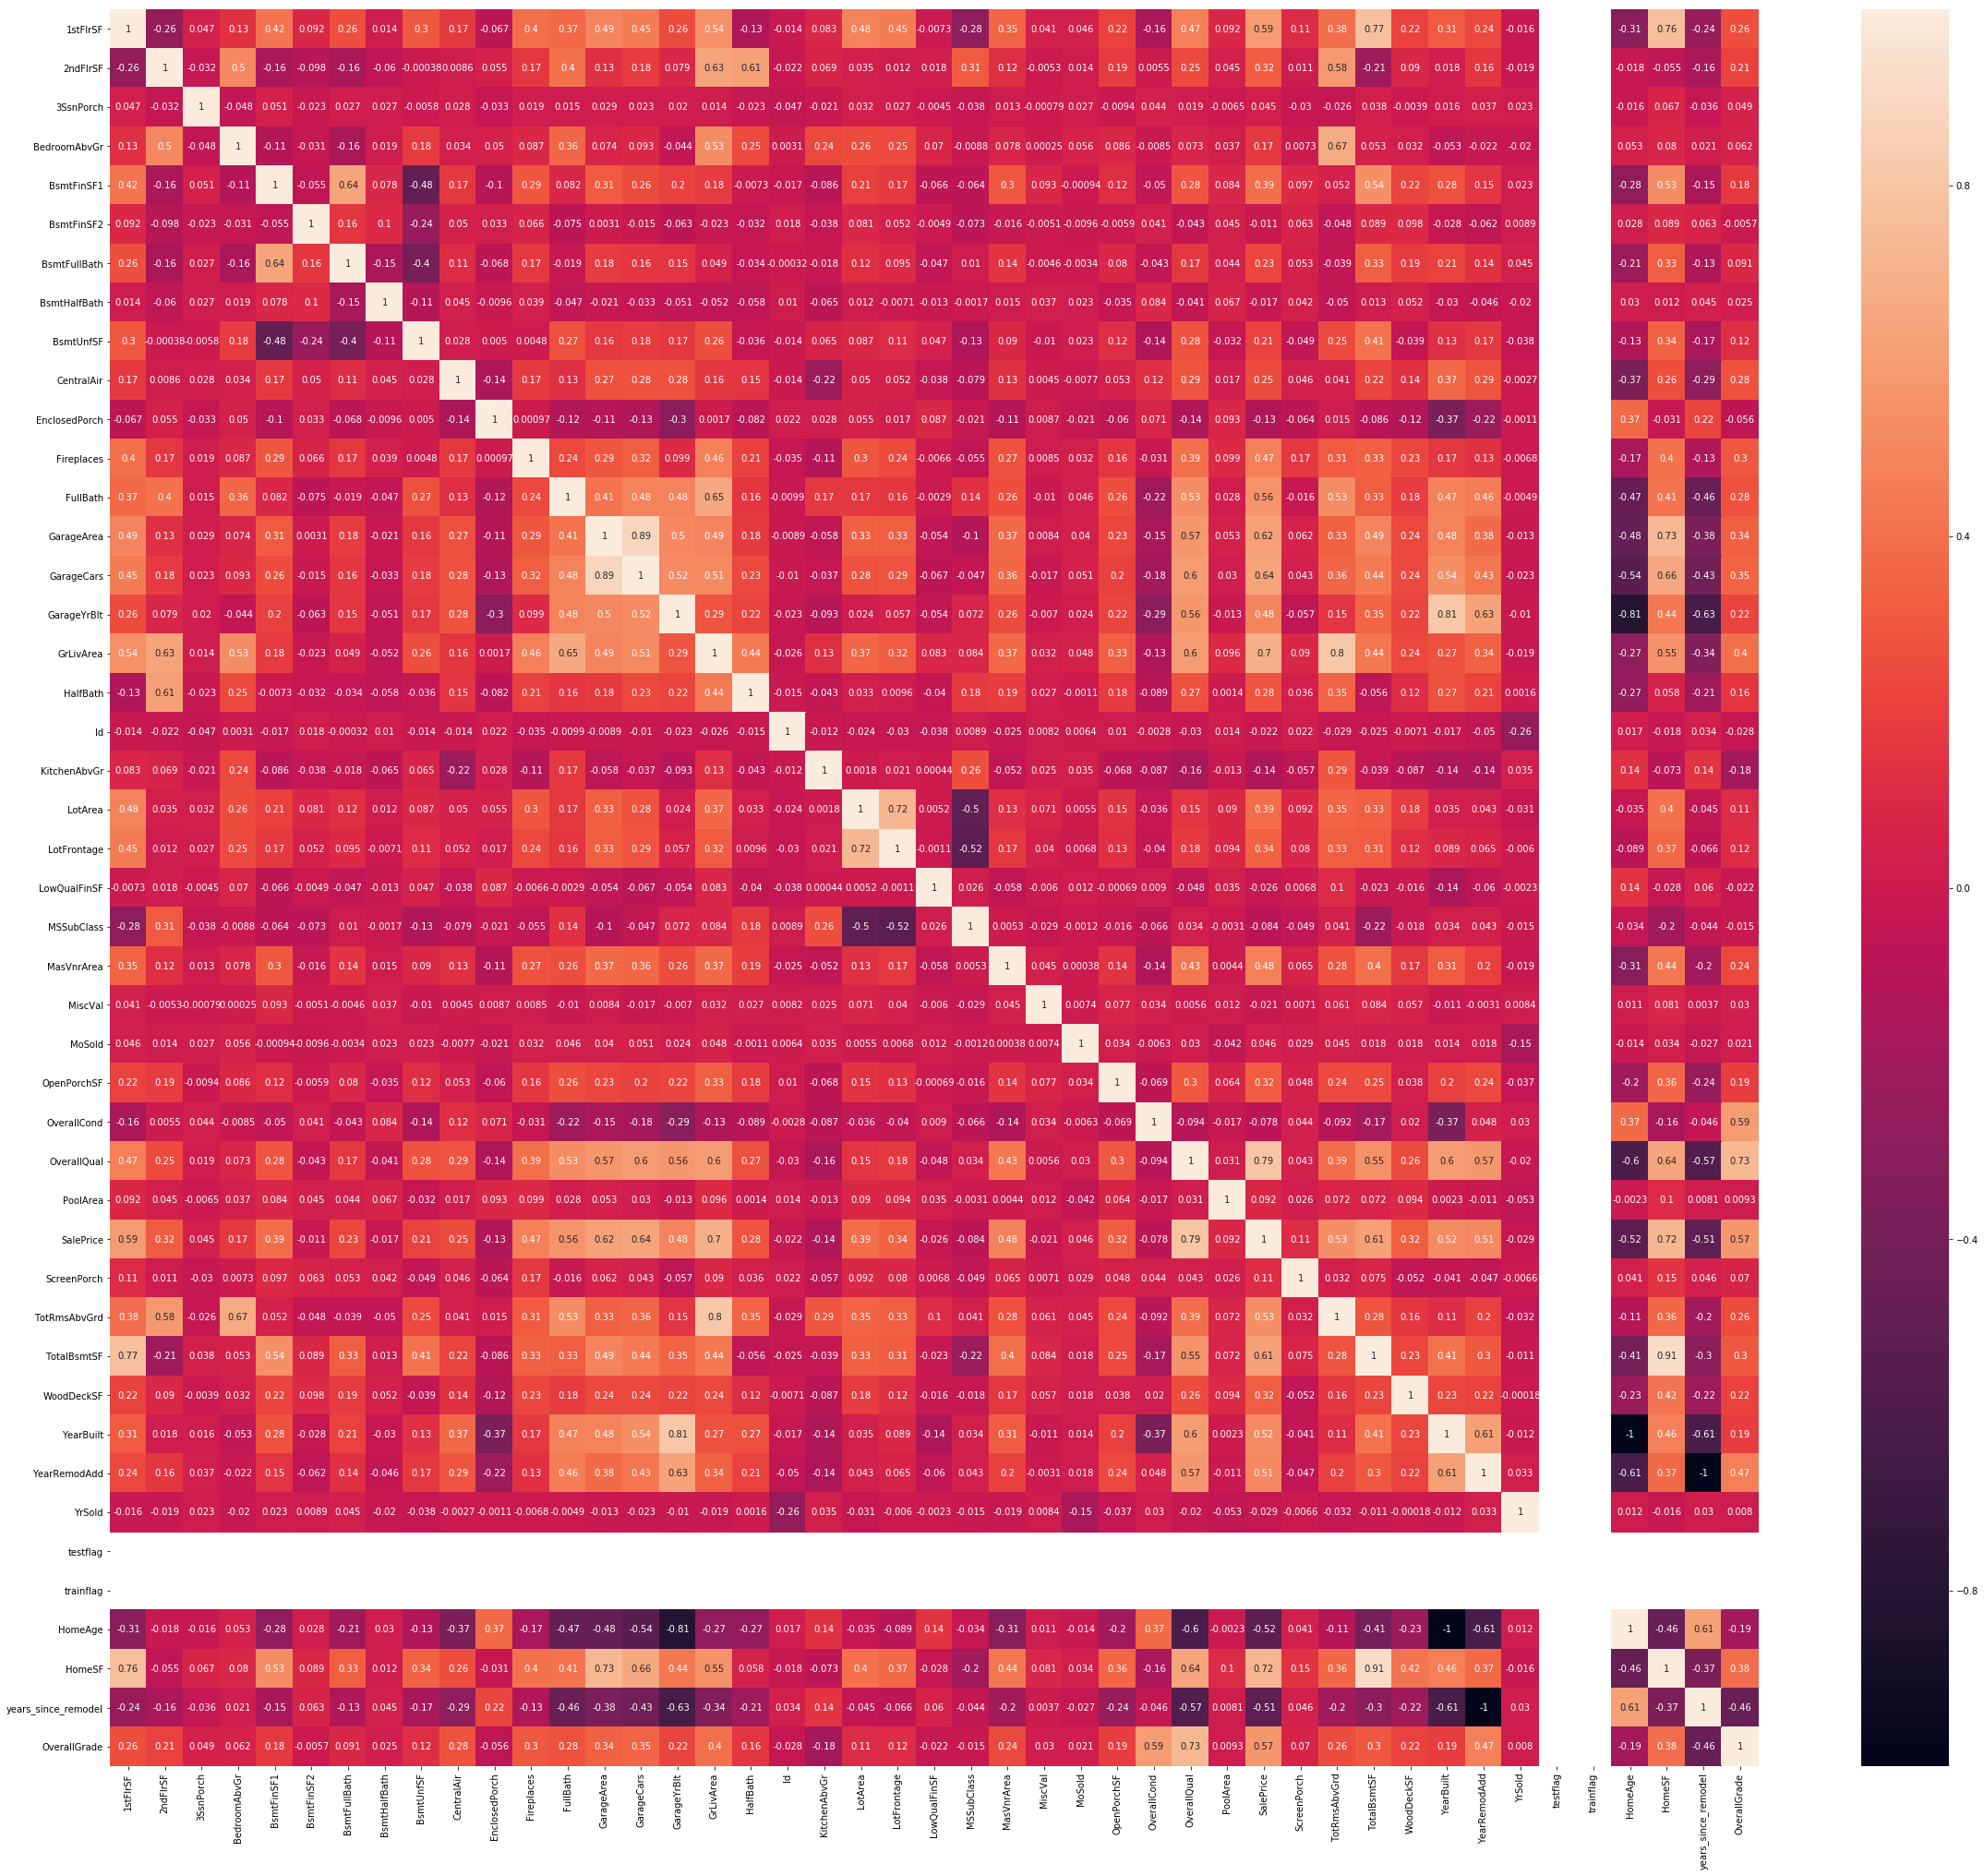

In [129]:
corr = cleaning_data.corr()
fig, ax = plt.subplots(figsize=(40, 35))
sns.heatmap(corr, annot=True)

In [130]:
cleaning_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,testflag,trainflag,HomeAge,HomeSF,years_since_remodel,OverallGrade
0,6.752270376141741970,854,0,No Alley Access,3,1Fam,TA,No,706.000000000000000000,0.000000000000000000,GLQ,Unf,1.000000000000000000,0.000000000000000000,Gd,150.000000000000000000,1,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,No Fence Here!,0,PConc,2,Typ,548.000000000000000000,2.000000000000000000,TA,RFn,Attchd,2003.000000000000000000,7.444248649496705283,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,9.041921720351218994,Inside,4.174387269895636798,Reg,0,60,RL,196.000000000000000000,BrkFace,Nothing,0,2,CollgCr,61,5,7,Y,0,No Pool,CompShg,Gable,Normal,208500.000000000000000000,WD,0,Pave,8,856.000000000000000000,AllPub,0,2003,2003,2008,nan,0.000000000000000000,16,1472.444248649496785220,5,35
1,7.140453043101158137,0,0,No Alley Access,3,1Fam,TA,Gd,978.000000000000000000,0.000000000000000000,ALQ,Unf,0.000000000000000000,1.000000000000000000,Gd,284.000000000000000000,1,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,No Fence Here!,1,CBlock,2,Typ,460.000000000000000000,2.000000000000000000,TA,RFn,Attchd,1976.000000000000000000,7.140453043101158137,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9.169518377455927904,FR2,4.382026634673881205,Reg,0,20,RL,0.000000000000000000,None,Nothing,0,5,Veenker,0,8,6,Y,0,No Pool,CompShg,Gable,Normal,181500.000000000000000000,WD,0,Pave,6,1262.000000000000000000,AllPub,298,1976,1976,2007,nan,0.000000000000000000,43,2027.140453043101160802,31,48
2,6.824373670043086371,866,0,No Alley Access,3,1Fam,TA,Mn,486.000000000000000000,0.000000000000000000,GLQ,Unf,1.000000000000000000,0.000000000000000000,Gd,434.000000000000000000,1,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,No Fence Here!,1,PConc,2,Typ,608.000000000000000000,2.000000000000000000,TA,RFn,Attchd,2001.000000000000000000,7.487733761436444091,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,9.328123407632565645,Inside,4.219507705176106960,IR1,0,60,RL,162.000000000000000000,BrkFace,Nothing,0,9,CollgCr,42,5,7,Y,0,No Pool,CompShg,Gable,Normal,223500.000000000000000000,WD,0,Pave,6,920.000000000000000000,AllPub,0,2001,2002,2008,nan,0.000000000000000000,18,1577.487733761436402347,6,35
3,6.867974408970292544,756,0,No Alley Access,3,1Fam,Gd,No,216.000000000000000000,0.000000000000000000,ALQ,Unf,1.000000000000000000,0.000000000000000000,TA,540.000000000000000000,1,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,No Fence Here!,1,BrkTil,1,Typ,642.000000000000000000,3.000000000000000000,TA,Unf,Detchd,1998.000000000000000000,7.448333860897475844,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9.164296433474776293,Corner,4.094344562222100414,IR1,0,70,RL,0.000000000000000000,None,Nothing,0,2,Crawfor,35,5,7,Y,0,No Pool,CompShg,Gable,Abnorml,140000.000000000000000000,WD,0,Pave,7,756.000000000000000000,AllPub,0,1915,1970,2006,nan,0.000000000000000000,104,1712.448333860897491832,36,35
4,7.043159915988340458,1053,0,No Alley Access,4,1Fam,TA,Av,655.000000000000000000,0.000000000000000000,GLQ,Unf,1.000000000000000000,0.000000000000000000,Gd,490.000000000000000000,1,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,No Fence Here!,1,PConc,2,Typ,836.000000000000000000,3.000000000000000000,TA,RFn,Attchd,2000.000000000000000000,7.695303134963566549,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,9.56521

In [131]:
cleaning_data.select_dtypes(include=['object']).shape

(2919, 40)

__Dummy Coding all of the cleaned data to ensure that shapes are the same__

In [55]:
cleaning_data.drop('Id', axis=1, inplace=True)

In [56]:
data_dummies = pd.get_dummies(cleaning_data)

In [57]:
train = data_dummies[data_dummies['trainflag'] == 0]
test = data_dummies[data_dummies['testflag'] == 1]

In [58]:
test = test.drop('SalePrice', axis=1)

In [59]:
test.shape
train.shape

(1459, 289)

(1460, 290)

Cool, now lets model

# Modeling

__Split the data, make sure to drop the testflag, trainflag, and label from the training set for our features__

In [60]:
from sklearn.model_selection import train_test_split
# Assigning the features and labels to variables before splitting them
label = train['SalePrice']
features = train.drop(['SalePrice', 'testflag', 'trainflag'], axis=1)


# #scale the features
# scale = preprocessing.StandardScaler()
# scale.fit(features)
# scaled_features = scale.transform(features)
# scaled_features

# Splitting the observations into a training and a testing set for the holdout method

X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    test_size=0.30, random_state=46)


__Define a function to score our regression models__

In [61]:
def get_score(model, norm=False):
        '''
        Fits the model and returns a series containing the RMSE, MAE, and R^2
        '''
        from sklearn.metrics import mean_squared_error, mean_absolute_error
        import time

        startTime = time.time()  # Getting training time
        
        # Fits with either regular or normalized training set
        if norm == False:
            model.fit(X_train, y_train)
            totalTime = time.time() - startTime
            predictions = model.predict(X_test)
        
            r2 = model.score(X_test, y_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            mae = mean_absolute_error(y_test, predictions)
        else:
            model.fit(X_train_norm, y_train)
            totalTime = time.time() - startTime
            predictions = model.predict(X_test_norm)
        
            r2 = model.score(X_test_norm, y_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            mae = mean_absolute_error(y_test, predictions)
            
        score_results = pd.Series([r2, rmse, mae, totalTime], index=['R^2', 'RMSE', 'MAE', 'TrainingTime(sec)'])
        
        return score_results

__LinearRegression__

In [62]:
# Linear regression - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1)
lmScore = get_score(lm)
lmScore

R^2                     0.886099816710188226
RMSE                25629.053181083691015374
MAE                 17370.792451895427802810
TrainingTime(sec)       0.093600034713745117
dtype: float64

__Decision Tree__

In [63]:
  # Decision tree - http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1)
dtScore = get_score(dt)
dtScore

R^2                     0.757814099356555526
RMSE                37371.865646829268371221
MAE                 24420.271689497716579353
TrainingTime(sec)       0.036345958709716797
dtype: float64

__KNN__

In [64]:
# k-NN - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=8, n_jobs=-1)
knnScore = get_score(knn)
knnScore

R^2                     0.792441927432087301
RMSE                34597.137318891618633643
MAE                 23203.841324200911913067
TrainingTime(sec)       0.027325391769409180
dtype: float64

__Yellowbrickroad is a really cool visualization package for looking at residual plotshttps://www.scikit-yb.org/en/latest/api/regressor/residuals.html__

ResidualsPlot(alpha=0.75,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002DBA19F9CC0>,
       hist=True, line_color=None, model=None, test_color=None,
       train_color=None)

0.7924419274320873

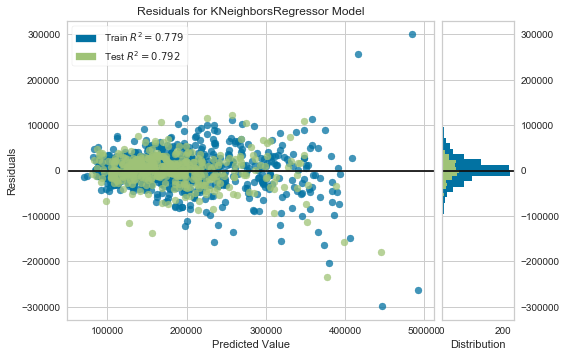

In [143]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(knn)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

__Our Friend Random Forest__

In [65]:
# Random Forest - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=None, n_jobs=-1, random_state=2)
rfScore = get_score(rf)
rfScore

R^2                     0.886764883504274071
RMSE                25554.119207004729105392
MAE                 16841.994863013696885901
TrainingTime(sec)       1.825381040573120117
dtype: float64

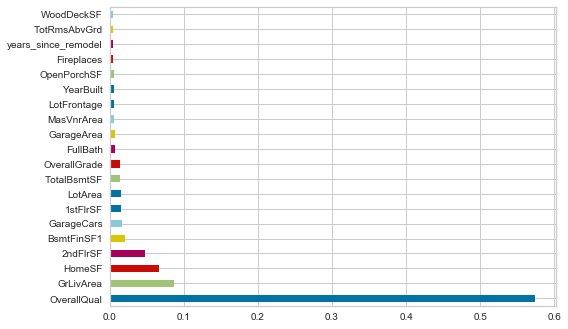

In [149]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(20).plot(kind='barh')

ResidualsPlot(alpha=0.75,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002DBA340A438>,
       hist=True, line_color=None, model=None, test_color=None,
       train_color=None)

0.8867648835042741

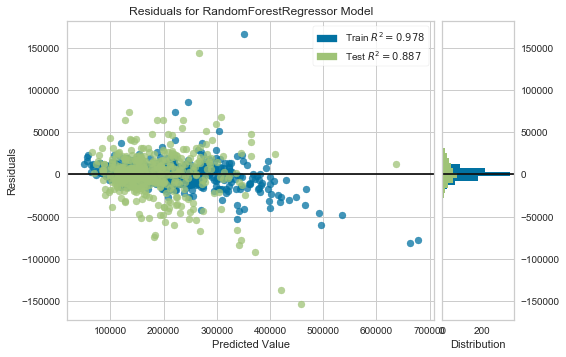

In [150]:
# Instantiate the linear model and visualizer

visualizer = ResidualsPlot(rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

__Lets do a gridsearch for max features__

In [152]:
import numpy.random as nr
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as model_selection
# this defines the inner cross-validation
nr.seed(123)
inside = model_selection.KFold(n_splits=10, shuffle = True)

#this defines outer cross-validation
nr.seed(321)
outside = model_selection.KFold(n_splits=10, shuffle = True)


## Define the dictionary for the grid search and the model object to search on
param_grid = {"max_features": list(range(1, 80, 1)), "min_samples_leaf":list(range(1, 20, 2))}

## Perform the grid search over the parameters
nr.seed(4455)
tuned_rf = model_selection.RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'r2',
                      return_train_score = True)

tuned_rf.fit(features, label)
print(tuned_rf.best_estimator_.max_features)
print(tuned_rf.best_estimator_.min_samples_leaf)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
          error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=2, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_features': [1, 13, 25, 37, 49, 61, 73, 85, 97, 109, 121, 133, 145, 157, 169, 181, 193, 205, 217, 229, 241, 253, 265, 277], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='r2', verbose=0)

169
1


In [153]:
nr.seed(498)
cv_estimate = model_selection.cross_val_score(tuned_rf, features, label, 
                                 cv = outside) # Use the outside folds

print('Mean R^2 = %4.3f' % np.mean(cv_estimate))
print('SDT of R^2       = %4.3f' % np.std(cv_estimate))
print('R^2 by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean R^2 = 0.870
SDT of R^2       = 0.048
R^2 by cv fold
Fold  1    0.906
Fold  2    0.870
Fold  3    0.844
Fold  4    0.917
Fold  5    0.809
Fold  6    0.912
Fold  7    0.888
Fold  8    0.903
Fold  9    0.889
Fold 10    0.764


In [155]:
#create final cross validation fold for best parameters
#this defines outer cross-validation
nr.seed(45678)
final = model_selection.KFold(n_splits=10, shuffle = True)

nr.seed(1115)
rf_best_params = RandomForestRegressor( 
                                max_features = tuned_rf.best_estimator_.max_features, 
                                min_samples_leaf = tuned_rf.best_estimator_.min_samples_leaf) 
rf_best_params.fit(features, label)

final_cv_estimate = model_selection.cross_val_score(rf_best_params, features, label, 
                                 cv = final) # Use the final folds

print('Mean R^2 = %4.3f' % np.mean(final_cv_estimate))
print('SDT of R^2       = %4.3f' % np.std(final_cv_estimate))
print('R^2 by cv fold')
for i, x in enumerate(final_cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=169, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Mean R^2 = 0.858
SDT of R^2       = 0.038
R^2 by cv fold
Fold  1    0.893
Fold  2    0.868
Fold  3    0.868
Fold  4    0.851
Fold  5    0.869
Fold  6    0.830
Fold  7    0.920
Fold  8    0.839
Fold  9    0.771
Fold 10    0.870


__Gradient Boosting__

In [66]:
# Gradient Boosted Trees - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.1, max_depth=3, random_state=1)
gbtScore = get_score(gbt)
gbtScore

R^2                     0.928708563323229597
RMSE                20276.315216694794798968
MAE                 13922.041264662015237263
TrainingTime(sec)      32.375237703323364258
dtype: float64

ResidualsPlot(alpha=0.75,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002DBA7039518>,
       hist=True, line_color=None, model=None, test_color=None,
       train_color=None)

0.9287085633232296

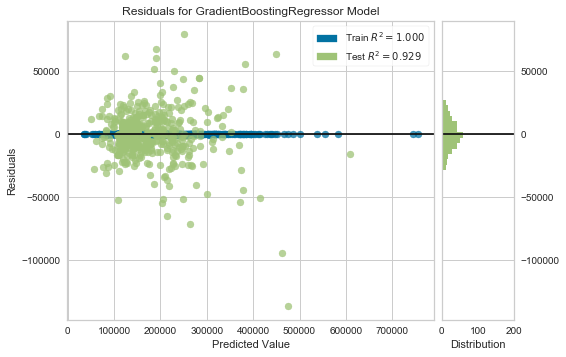

In [157]:

# Instantiate the linear model and visualizer

visualizer = ResidualsPlot(gbt)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

__Elastic Net Regressor__

In [67]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
ENScore = get_score(ENet)
ENScore

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



R^2                     0.889384426658056171
RMSE                25256.809474473502632463
MAE                 17127.138780132343526930
TrainingTime(sec)       0.356440067291259766
dtype: float64

__XGBoost__

In [68]:
# from xgboost import XGBClassifier
# xg = XGBClassifier(n_estimators=100)
# xgScore = get_score(xg)
# xgScore

__Lasso Regression__

In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lassoScore = get_score(lasso)
lassoScore

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



R^2                     0.892396942119863090
RMSE                24910.512202307774714427
MAE                 16936.207907002855790779
TrainingTime(sec)       0.253572463989257812
dtype: float64

# OK, So...this LGBMR improved our score a lot

In [70]:
import lightgbm as lgb

In [71]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [72]:
mlgbScore = get_score(model_lgb)
mlgbScore

R^2                     0.920723902115150761
RMSE                21381.663153690162289422
MAE                 14353.140692371947807260
TrainingTime(sec)       0.481592178344726562
dtype: float64

__Notice here that the lgb and model_lgb models are different in their accuracy, the difference in these models (one of) lies in the number of trees, the lgb model has a lot more trees and scores worse__

# Predict New Data for Submission

In [73]:
features.shape
test.shape

(1460, 287)

(1459, 289)

__Dropping the trainflag and testflag from our test data__

In [74]:
test = test.drop(['trainflag', 'testflag'], axis=1)

In [75]:
features.shape
test.shape

(1460, 287)

(1459, 287)

__Making the data the same shape for prediction, this was something I kept having to do when I didn't dummy code the entire data set together, so maybe this isn't necessary anymore?__

In [ ]:
# # Get missing columns in the training test
# missing_cols = set(features.columns ) - set(test_feature_dummies.columns )
# # Add a missing column in test set with default value equal to 0
# for c in missing_cols:
#     test_feature_dummies[c] = 0
# # Ensure the order of column in the test set is in the same order than in train set
# test = test_feature_dummies[features.columns]

In [76]:
test.shape
features.shape

(1459, 287)

(1460, 287)

__need to add in the ppsf column to the test set__

In [78]:
gbt.predict(test)

array([122528.24165312, 162912.84411742, 188893.87321782, ...,
       167672.794689  , 108863.08642387, 229100.65319396])

__Why did scaling all of our test features make our predictions so fucking bad?__

# Stacking predictions and taking the average
- Here we are using Random Forest, Gradient Boosting, LGBM Regressor, and Elastic Net Regressor to predict our test set, we will then take these predictions and average them to see if we can get a better score than using only one model

In [81]:
stacked_pred = (rf.predict(X_test) + gbt.predict(X_test) + model_lgb.predict(X_test) + 
                ENet.predict(X_test) + model_lgb.predict(X_test)) / 5

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, stacked_pred)
np.sqrt(mean_squared_error(y_test, stacked_pred))

13155.928951160155

20067.770862301044

__We can stack multiple of the same models here as well__

In [ ]:
## Getting our SalePrice estimation
Final_labels = (rf.predict(test) + gbt.predict(test) + model_lgb.predict(test) + ENet.predict(test) + 
                model_lgb.predict(test)) / 5

In [ ]:
pd.DataFrame(Final_labels).to_csv('x48.csv')

__Stacking or 'ensembling' these increased our score greatly__ 

__Looking at Skew of features__
- I am going to address skew if I come back to this competition ever ha

In [83]:
cleaning_data.skew()

1stFlrSF               0.063895035999304461
2ndFlrSF               0.862117832565764242
3SsnPorch             11.381914394786642575
BedroomAbvGr           0.326492149270799170
BsmtFinSF1             1.425966313393977725
BsmtFinSF2             4.148165577295465312
BsmtFullBath           0.625153409879868782
BsmtHalfBath           3.933615512915909385
BsmtUnfSF              0.919981134109466248
CentralAir            -3.460801160475996507
EnclosedPorch          4.005950070504264993
Fireplaces             0.733871770878102958
FullBath               0.167691918188823785
GarageArea             0.241341818158039539
GarageCars            -0.218704920805469355
GarageYrBlt           -0.359479437963011017
GrLivArea              0.012385663552313695
HalfBath               0.694923649271656396
KitchenAbvGr           4.304466641562934903
LotArea               -0.505542201625105436
LotFrontage           -1.074389190137413186
LowQualFinSF          12.094977192517301745
MSSubClass             1.3761646